
#### Name : Smit Sachin Vhora
### Roll No : 2337010
### Batch : A

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('data.csv')
data=df[['password','strength']]

In [3]:
data

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
...,...,...
669872,10redtux10,1
669873,infrared1,1
669874,184520socram,1
669875,marken22a,1


In [4]:
data['strength'].unique()

array(['1', '2', '0', 'selim_syl1905@hotmail.com',
       'delioreanxs@hotmail.com', 'mt2gurur@hotmail.com',
       'facebookselim4@hotmail.com', 'anakonda_252@hotmail.com',
       'mamedov.kenan@mail.ru', 'destek@migmedya.com',
       'elitebank44@gmail.com', 'memleketim.info@gmail.com',
       'canersastim@gmail.com', 'arifselim.ask@gmail.com',
       'octoberwind@mynet.com', 'sado_370@hotmail.com',
       'djexploit@gmail.com', 'bursabursa2@hotmail.com',
       'info@kayimoglu.com', 'drselimcelik@gmail.com',
       'bykudelfa@hotmail.com', 'kralkotsk@mynet.com',
       'mnyk12@hotmail.com', 'elitebilgisayar26@gmail.com',
       'elumre@gmail.com', 'selim.ozmen07@hotmail.com',
       'selimkaratas@windowslive.com', 'crazy_boeing@yahoo.com',
       'imkbticaretmeslek@gmail.com', 'mrcds.grmnt@yahoo.com',
       'mert_kaya09@hotmail.com', 'beratmisimi1@gmail.com',
       'cousto@live.com', 'boystreet04@gmail.com',
       'hackerbbqueen15@hotmail.com', 'brkyc3@hotmail.com',
       'bursa

In [5]:
allowed_values = ['1', '0', '2']
df1 = df[df['strength'].isin(allowed_values)]

In [6]:
df = df1.drop(columns=['Unnamed: 2'])

In [7]:
df

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
...,...,...
669872,10redtux10,1
669873,infrared1,1
669874,184520socram,1
669875,marken22a,1


In [8]:
df.isnull().sum()

password    1
strength    0
dtype: int64

In [9]:
df.dropna()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
...,...,...
669872,10redtux10,1
669873,infrared1,1
669874,184520socram,1
669875,marken22a,1


In [10]:
df.describe()

,password,strength
count,669639,669640
unique,669556,3
top,0,1
freq,4,496801


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669640 entries, 0 to 669876
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669639 non-null  object
 1   strength  669640 non-null  object
dtypes: object(2)
memory usage: 15.3+ MB


In [12]:
df['strength'] = df['strength'].astype(int)

In [13]:
labels=df['strength'].value_counts()
labels

1    496801
0     89702
2     83137
Name: strength, dtype: int64

([<matplotlib.patches.Wedge at 0x20d755c3e80>,
 [Text(-0.757756282435579, 0.7973740755940159, '1'),
  Text(0.39766796641864954, -1.02560235397763, '0'),
  Text(1.0173855324841206, -0.41824236788255076, '2')],
 [Text(-0.41332160860122485, 0.4349313139603722, '74.2%'),
  Text(0.2169097998647179, -0.55941946580598, '13.4%'),
  Text(0.5549375631731566, -0.22813220066320947, '12.4%')])

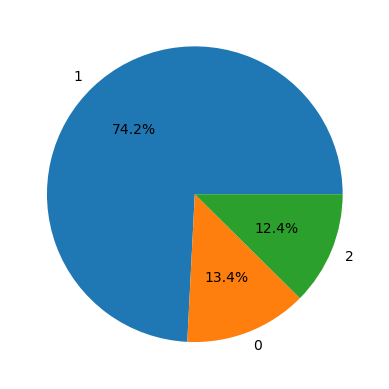

In [14]:
import matplotlib.pyplot as pt
pt.pie(labels, labels=labels.index, autopct='%1.1f%%')

In [15]:
from sklearn.utils import resample

strength_0 = df[df['strength'] == 0]
strength_1 = df[df['strength'] == 1]
strength_2 = df[df['strength'] == 2]

min_size = min(len(strength_0), len(strength_1), len(strength_2))

strength_1_undersampled = resample(strength_1, replace=False, n_samples=min_size, random_state=42)

balanced_df = pd.concat([strength_0, strength_1_undersampled, strength_2])

balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [16]:
balanced_df=balanced_df.dropna()

In [17]:
val=balanced_df['strength'].value_counts()
val

0    89701
1    83137
2    83137
Name: strength, dtype: int64

([<matplotlib.patches.Wedge at 0x20d756d8b80>,
 [Text(0.49806890306561374, 0.9807789597044874, '0'),
  Text(-1.0964324509567807, -0.0885205088604169, '1'),
  Text(0.5753799642965612, -0.9375168780806499, '2')],
 [Text(0.27167394712669835, 0.5349703416569931, '35.0%'),
  Text(-0.5980540641582439, -0.04828391392386376, '32.5%'),
  Text(0.31384361688903334, -0.5113728425894453, '32.5%')])

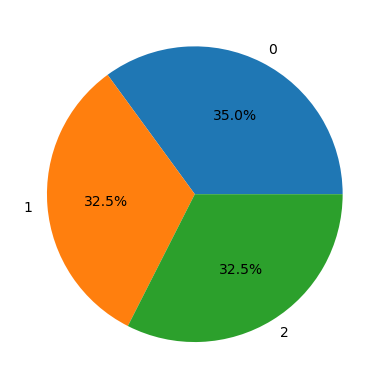

In [18]:
pt.pie(val, labels=val.index, autopct='%1.1f%%')

In [19]:
balanced_df['strength']=balanced_df['strength'].replace(0,"Weak")
balanced_df['strength']=balanced_df['strength'].replace(1,"Medium")
balanced_df['strength']=balanced_df['strength'].replace(2,"Strong")

In [20]:
def word(password):
    character=[]
    for i in password:
        character.append(i)
    return character
  
x = np.array(balanced_df["password"])
y = np.array(balanced_df["strength"])

tdif = TfidfVectorizer(tokenizer=word)
x = tdif.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size=0.3,random_state=42)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [21]:
model = RandomForestClassifier()
model.fit(xtrain, ytrain)
r_s=model.score(xtest, ytest)
print(r_s)

0.9482765356217363


In [22]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
dt_s=dt.score(xtest, ytest)
print(dt_s)

0.8855234201033948


In [24]:
balanced_df['strength']=balanced_df['strength'].replace("Weak",0)
balanced_df['strength']=balanced_df['strength'].replace("Medium",1)
balanced_df['strength']=balanced_df['strength'].replace("Strong",2)
x = np.array(balanced_df["password"])
y = np.array(balanced_df["strength"])

tdif = TfidfVectorizer(tokenizer=word)
x = tdif.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size=0.3,random_state=42)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [25]:
from xgboost import XGBClassifier

xg =XGBClassifier()
xg.fit(xtrain, ytrain)
xg_s=xg.score(xtest, ytest)
print(xg_s)

0.9815868633859857


In [26]:
accu=pd.DataFrame({'Model':
                     ['RandomForestClassifier','DecisionTreeClassifier','XGBClassifier'],
                     'Test Accuracy':
                     [r_s*100,dt_s*100,xg_s*100]
                     })

In [27]:
accu

,Model,Test Accuracy
0,RandomForestClassifier,94.827654
1,DecisionTreeClassifier,88.552342
2,XGBClassifier,98.158686


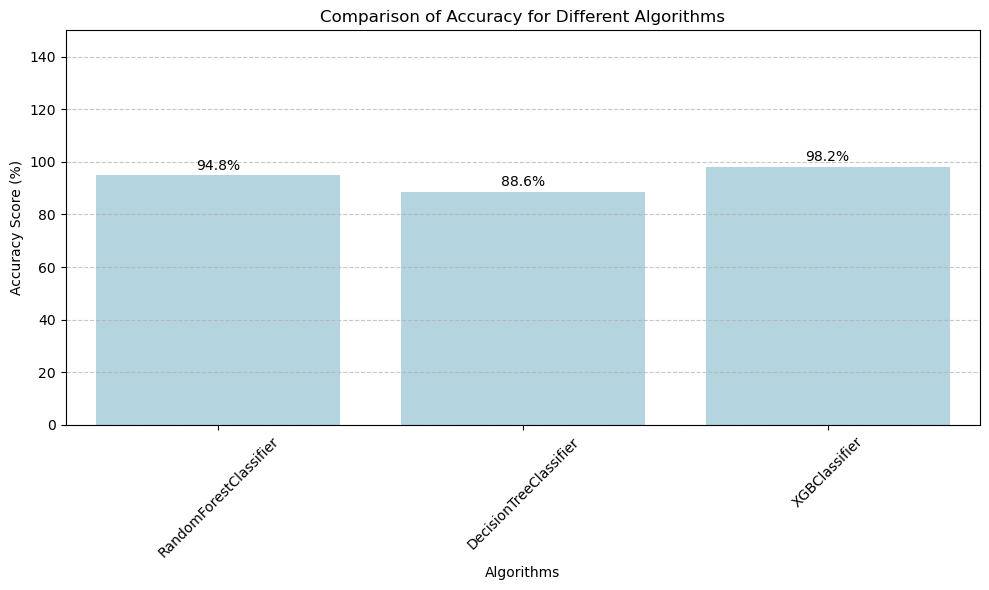

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
accuracy = [r_s*100,dt_s*100,xg_s*100]
algorithms = ['RandomForestClassifier','DecisionTreeClassifier','XGBClassifier']


plt.figure(figsize=(10, 6))
sns.barplot(x=algorithms, y=accuracy, color='lightblue')  
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score (%)')
plt.title('Comparison of Accuracy for Different Algorithms')
plt.ylim(0, 150)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for i, v in enumerate(accuracy):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()